In [2]:
import matplotlib.pyplot as plt
import os
import numpy as np
from skimage.io import imread
from sklearn.model_selection import train_test_split
from skimage.transform import resize
import seaborn as sns


In [3]:
target = []
images = []
flat_data = []
PATH = 'C:\\Users\\YakupAkdin\\AAAaVeriMadenciligi\\data'
#'
cate = ['arp','kanun','elektroGitar','baglama','gitar','keman','kemence','mandolin','ud','yayliTambur']
import io            
#Görüntü Formatı ve diziye atama
for category in cate:
    class_num = cate.index(category)
    path = os.path.join(PATH,category)
    for img in os.listdir(path):
        img_array = imread(os.path.join(path,img),'*.jpg')
        img_array= resize(img_array, (64,64,3))
        images.append(img_array)
        img_array = img_array.flatten()
        flat_data.append(img_array)
        target.append(class_num)
           
flat_data = np.array(flat_data)
target = np.array(target)
images = np.array(images)
print(flat_data)

C:\Users\YakupAkdin\AppData\Roaming\Python\Python38\site-packages\PIL\TiffImagePlugin.py:850: UserWarning: Truncated File Read
  warnings.warn(str(msg))


[[0.33257955 0.33257955 0.33257955 ... 0.44784809 0.44784809 0.44784809]
 [0.58866302 0.58866302 0.58866302 ... 0.14147356 0.14147356 0.14147356]
 [0.29848917 0.29848917 0.29848917 ... 0.66273705 0.66273705 0.66273705]
 ...
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.00868384 0.00868384 0.00868384 ... 0.00970886 0.00970886 0.00970886]
 [0.         0.         0.         ... 0.         0.         0.        ]]


In [4]:
# Train-Test
x_train, x_test, y_train, y_test = train_test_split(
    flat_data, target, test_size=0.33, random_state=1)

In [5]:
from sklearn.tree import DecisionTreeClassifier
x_train.shape
clf = DecisionTreeClassifier(criterion="entropy")
clf.fit(x_train, y_train)


DecisionTreeClassifier(criterion='entropy')

In [14]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score

predictions = clf.predict(x_test)

              precision    recall  f1-score   support

         arp       0.10      0.16      0.12        45
       kanun       0.23      0.19      0.21       164
elektroGitar       0.55      0.58      0.56       557
     baglama       0.42      0.44      0.43       397
       gitar       0.68      0.65      0.66       679
       keman       0.39      0.32      0.35       240
     kemence       0.21      0.20      0.21       159
    mandolin       0.16      0.19      0.17       177
          ud       0.38      0.39      0.38       256
 yayliTambur       0.07      0.07      0.07        40

    accuracy                           0.45      2714
   macro avg       0.32      0.32      0.32      2714
weighted avg       0.45      0.45      0.45      2714

Sensitivity :  0.7777777777777778
Specificity :  0.775
Precision = 0.454
Accuracy: 0.44841562269712604
Error-rate =  0.5515843773028739


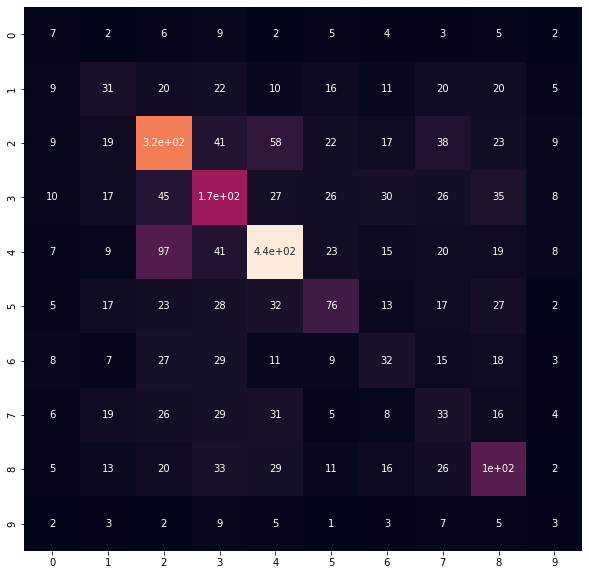

In [27]:
from sklearn.metrics.pairwise import laplacian_kernel
#Grafik 
cm = confusion_matrix(y_test, predictions)
fig, ax = plt.subplots(figsize=(10, 10))
sns.heatmap(cm, annot=True, xticklabels=sorted(set(y_test)), yticklabels=sorted(set(y_test)), cbar=False, ax=ax)

print(classification_report(y_test, predictions, target_names=cate))
sensitivity1 = cm[0,0]/(cm[0,0]+cm[0,1])
print('Sensitivity : ', sensitivity1 )

specificity1 = cm[1,1]/(cm[1,0]+cm[1,1])
print('Specificity : ', specificity1)
print("Precision = %.3f" % metrics.precision_score(y_test, predictions, average='weighted'))
acc = metrics.accuracy_score(y_test, pred_y)
error_rate = 1-acc
print("Accuracy:",acc)
print("Error-rate = ",error_rate)
